# Death Comparison

This script was written to provide easy interpretation of death statistics for four locations. It has been initialised to load the data available [here](https://www.ons.gov.uk/peoplepopulationandcommunity/healthandsocialcare/causesofdeath/datasets/deathregistrationsandoccurrencesbylocalauthorityandhealthboard) The link allows an excel file to be downloaded. This script requires the 'Occurrences - All data' to be exported into a single CSV file.

I make no claim that this script is overly efficient, it was made for personal interest.

Any questions please contact:
> Andrew Paul Barnes<br>
> Doctoral Student & Teaching Assistant<br>
> Department of Architecture and Civil Engineering<br>
> University of Bath<br>
> a.p.barnes@bath.ac.uk

## Libraries

To begin several libraries are imported to allow easy manipulation of the data.

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading Data Required

First the areas of interest are defined in the variable *AREAS* and the file name/location are given in *MASTER_FILE*.

In [38]:
AREAS = ["Swindon", "Northampton", "Wiltshire", "Cheltenham"]
MASTER_FILE = "occurrences-alldata.csv"

Next, the CSV file is loaded and mined to retrieve only the areas indicated above and only covid-19 related deaths.

In [95]:
# Load data
weekly_deaths = pd.read_csv(MASTER_FILE, delimiter=',', skiprows=3)

# Filter to only contain the areas of interest
weekly_deaths = weekly_deaths.loc[weekly_deaths['Area name'].isin(AREAS)]
weekly_deaths = weekly_deaths.loc[weekly_deaths['Cause of death'] == "COVID 19"]

# Select the columns required
weekly_deaths = weekly_deaths[["Area name", "Week number", "Place of death", "Number of deaths"]]

# Extract the range of death locations and enumerate them.
death_locations = weekly_deaths["Place of death"].unique().tolist()
for locidx, dloc in enumerate(death_locations):
    weekly_deaths = weekly_deaths.replace(to_replace=dloc, value=locidx)

Finally, split the data into areas. This step is to simplify the process of plotting and aggregating of weekly data.

In [96]:
def split_data(deaths, areas):
    """ Splits the data from a master pandas sheet into area matrices. """
    area_matrices = {}
    for area in areas:
        area_matrices[area] = deaths.loc[deaths['Area name'] == area].iloc[:, 1:].to_numpy()
    return area_matrices
area_data = split_data(weekly_deaths, AREAS)

## Weekly Deaths Comparison

This first analysis section will take the weekly total deaths of each area and generate a graph showing how these vary in each chosen area.

In [101]:
def generate_weekly_totals(data):
    """ Combines the data into weekly death totals per area. """
    weekly_data = {}
    for area in data:
        weekly_data[area] = np.zeros((2, np.max(data[area][:, 0])))
        for week in range(1, np.max(data[area][:, 0])+1):
            weekly_data[area][0, week-1] = week
            weekly_data[area][1, week-1] = np.sum(data[area][data[area][:, 0] == week, -1])
    return weekly_data
weekly_data = generate_weekly_totals(area_data)

Next, we plot the weekly deaths data for each area on the same graph.

**BEWARE** interpreting this data is not as easy as first though, different population sizes, densities and other factors all play a role.

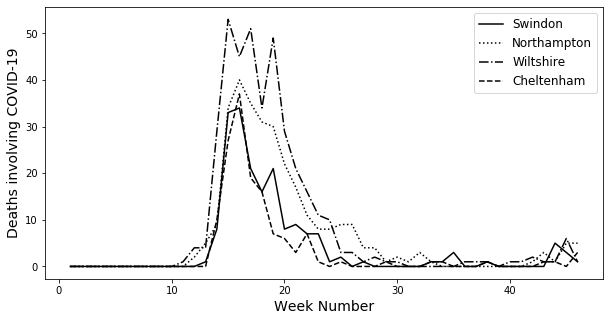

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

linetypes = ["-", ":", "-.", "--"]

for idx, area in enumerate(AREAS):
    axs.plot(weekly_data[area][0, :], weekly_data[area][1, :], ls=linetypes[idx], c='k', label=area)

axs.set_xlabel("Week Number", fontsize=14)
axs.set_ylabel("Deaths involving COVID-19", fontsize=14)
axs.legend(fontsize=12)